In [1]:
%matplotlib inline
import pandas as pd

In [2]:
%ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: DA7E-6F29

 Directorio de c:\Users\gmgar\OneDrive\Documentos\platzi\machine_learning\Proyecto_cdc\notebooks

21/04/2022  08:25 a. m.    <DIR>          .
21/04/2022  08:25 a. m.    <DIR>          ..
05/05/2022  07:31 a. m.           418,845 2_exploracion.ipynb
05/05/2022  07:33 a. m.            12,438 3_enriquecimiento.ipynb
20/04/2022  10:35 p. m.                 0 4_modelacion.ipynb
05/05/2022  07:24 a. m.            72,930 carga_y_limpieza.ipynb
05/05/2022  07:23 a. m.    <DIR>          data
               4 archivos        504,213 bytes
               3 dirs  133,987,835,904 bytes libres


In [3]:
compras_df = pd.read_csv('data/compras_marzo_2022_enriquecido.csv')

In [5]:
data = compras_df.copy()
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())


In [6]:
data.head(5)

,CVE BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA\nPAGO,IMPORTE,SHEET,Dia,Mes,Año,BENEFICIARIO_SALES,IMPORTE_GATO_PROMEDIO
0,111017,342,339,1751,435,1597,1,1021838.0,2,210691.81,0,4,3,2022,22,440975.940759
1,111017,342,339,1752,435,1604,1,1021838.0,2,88044.01,0,4,3,2022,22,440975.940759
2,111017,342,339,1753,435,1602,1,1021838.0,2,871.71,0,4,3,2022,22,440975.940759
3,111017,342,339,1754,435,1602,1,1021838.0,2,143554.60,0,4,3,2022,22,440975.940759
4,111017,342,339,1757,435,1604,1,1021838.0,2,871.71,0,4,3,2022,22,440975.940759


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

In [8]:
y = data.pop('IMPORTE')
X = data.copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [10]:
clf = RandomForestRegressor(n_estimators=1000, max_depth = 4)

In [11]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(y_test, clf.predict(X_test))

0.22697144618073384

## Probar un modelo no supervisado o de clustering para texto

In [15]:
import gensim
from nltk.corpus import stopwords
import numpy as np
np.random.seed(2022)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [16]:
def preprocess(text):
    result = []
    for token in text.split():
        if token not in stopwords.words('spanish') and len(token)>4:
            result.append(token)
    return result

In [17]:
process_business = [preprocess(x) for x in list(compras_df['BENEFICIARIO'].unique())]

In [18]:
dictionary = gensim.corpora.Dictionary(process_business)

In [19]:
dictionary.filter_extremes(no_below=1, no_above=0.5)

In [20]:
bow_corpus = [dictionary.doc2bow(doc) for doc in process_business]

In [21]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=dictionary, passes=10, workers=2)

In [22]:
for idx, type_business in lda_model.print_topics(-1):
    print('Topic:{} Words:{}'.format(idx, type_business))

Topic:0 Words:0.025*"GARCIA" + 0.019*"HERNANDEZ" + 0.017*"MARIA" + 0.016*"ALVARADO" + 0.016*"JAVIER" + 0.013*"MORALES" + 0.013*"REYNA" + 0.011*"CARLOS" + 0.011*"CARRILLO" + 0.010*"RAMIREZ"
Topic:1 Words:0.028*"GONZALEZ" + 0.026*"HERNANDEZ" + 0.021*"GARZA" + 0.015*"ALBERTO" + 0.013*"GARCIA" + 0.012*"FERNANDO" + 0.012*"JORGE" + 0.010*"RODRIGUEZ" + 0.010*"SALAZAR" + 0.009*"SERVICIOS"
Topic:2 Words:0.013*"GARZA" + 0.013*"PEREZ" + 0.013*"CONSTRUCCIONES," + 0.013*"RODRIGUEZ" + 0.013*"CONSTRUCTORA" + 0.010*"HERNANDEZ" + 0.010*"INSTITUTO" + 0.010*"LOPEZ" + 0.007*"CANTU" + 0.007*"MONTERREY,"
Topic:3 Words:0.019*"RODRIGUEZ" + 0.019*"MARIA" + 0.016*"RAMIREZ" + 0.014*"LOPEZ" + 0.014*"MARTINEZ" + 0.011*"CONSTRUCCIONES" + 0.008*"GRUPO" + 0.008*"GOMEZ" + 0.008*"GERARDO" + 0.008*"ALEJANDRO"
Topic:4 Words:0.019*"ALBERTO" + 0.019*"ANTONIO" + 0.019*"JESUS" + 0.016*"RICARDO" + 0.010*"ORTIZ" + 0.010*"ALEJANDRO" + 0.010*"HERNANDEZ" + 0.010*"JORGE" + 0.010*"CASTRO" + 0.009*"RODRIGUEZ"
Topic:5 Words:0.045*"MA

In [23]:
def get_max_topic(index):
    results = lda_model[bow_corpus[index]]
    return max(lda_model[results], key=lambda x: x[1])[0]

In [24]:
business_cluster = {x: get_max_topic(i) for i, x in enumerate(list(compras_df['BENEFICIARIO'].unique()))}

In [25]:
compras_df['CLUSTER_NAME'] = compras_df['BENEFICIARIO'].apply(lambda x: business_cluster[x])


<AxesSubplot:xlabel='CLUSTER_NAME'>

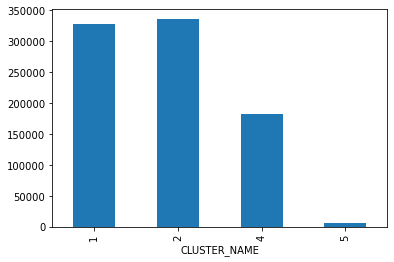

In [26]:
compras_df.groupby('CLUSTER_NAME')['IMPORTE'].mean().plot.bar()

## Probar un modelo no supervisado de anomalías en cuanto a importes

In [27]:
import numpy as np
from scipy.stats import norm

In [28]:
params = norm.fit(compras_df['IMPORTE'])

In [29]:
params

(329517.62993811246, 1584633.0008926978)

In [30]:
compras_df['PROB_TOTAL'] = [norm(params[0], params[1]).cdf(x) for x in compras_df['IMPORTE']]


In [31]:
compras_df[compras_df['PROB_TOTAL']>0.95]

,CVE BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA\nPAGO,IMPORTE,SHEET,Dia,Mes,Año,BENEFICIARIO_SALES,IMPORTE_GATO_PROMEDIO,CLUSTER_NAME,PROB_TOTAL
386,115789,"HISA FARMACEUTICA, S.A. DE C.V.",CHI990710I32,M102433-183011-110,SAD-538-2019,CONSUMO DE MEDICAMENTOS DEL 8 AL 12 DE NOVIEMB...,TR,1021799.0,2022-03-02,3045161.35,GTOS VARIOS,2,3,2022,37,440975.940759,1,0.956711
390,115789,"HISA FARMACEUTICA, S.A. DE C.V.",CHI990710I32,M102934-183011-114,SAD-538-2019,CONSUMO DE MEDICAMENTOS DEL 22 AL 30 DE NOVIEM...,TR,1021799.0,2022-03-02,4535635.41,GTOS VARIOS,2,3,2022,37,440975.940759,1,0.996027
399,115789,"HISA FARMACEUTICA, S.A. DE C.V.",CHI990710I32,M104113-183011-121,SAD-538-2019,CONSUMO DE MEDICAMENTOS DEL 27 AL 31 DE DICIEM...,TR,1021814.0,2022-03-04,3249991.58,GTOS VARIOS,4,3,2022,37,440975.940759,1,0.967335
405,115789,"HISA FARMACEUTICA, S.A. DE C.V.",CHI990710I32,M104267-183011-128,SAD-538-2019,CONSUMO DE MEDICAMENTOS DEL 1 AL 10 DE DICIEMB...,TR,1021814.0,2022-03-04,4450751.73,GTOS VARIOS,4,3,2022,37,440975.940759,1,0.995349
433,116308,"SI VALE MEXICO, S.A. DE C.V.",PUN9810229R0,146827-183010-667,SAD-567-2019,BONOS DE DESPENSA PERSONAL SINDICALIZADO Q2-2022,TR,1022027.0,2022-03-29,5647250.00,GTOS VARIOS,29,3,2022,10,440975.940759,2,0.999604
435,116308,"SI VALE MEXICO, S.A. DE C.V.",PUN9810229R0,146830-183010-669,SAD-567-2019,BONOS DE DESPENSA PERSONAL JUBILADO Y PENSIONA...,TR,1022027.0,2022-03-29,3662700.00,GTOS VARIOS,29,3,2022,10,440975.940759,2,0.982286
437,116308,"SI VALE MEXICO, S.A. DE C.V.",PUN9810229R0,146832-183010-671,SAD-567-2019,BONOS DE DESPENSA POR RIESGO Q2-2022,TR,1022027.0,2022-03-29,3714000.00,GTOS VARIOS,29,3,2022,10,440975.940759,2,0.983653
456,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS140133-183011-163,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000073.0,2022-03-03,9000000.00,GTOS VARIOS,3,3,2022,4,440975.940759,1,1.000000
457,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS140134-183011-164,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000073.0,2022-03-03,3854000.00,GTOS VARIOS,3,3,2022,4,440975.940759,1,0.986931
458,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS142450-183011-933,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000075.0,2022-03-31,9000000.00,GTOS VARIOS,31,3,2022,4,440975.940759,1,1.000000


In [32]:
models_sheet={}
for sheet in list(compras_df['SHEET'].unique()):
    sheet_compras = compras_df[compras_df['SHEET'] == sheet]
    params = norm.fit(sheet_compras['IMPORTE'])
    models_sheet[sheet] = norm(params[0], params[1])

In [33]:
sheet_prob = []
for i, row in compras_df.iterrows():
    sheet_prob.append(models_sheet[row['SHEET']].cdf(row['IMPORTE']))
compras_df['PROB_SHEET'] = sheet_prob

In [34]:
compras_df[compras_df['PROB_SHEET']>0.95]

,CVE BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA\nPAGO,IMPORTE,SHEET,Dia,Mes,Año,BENEFICIARIO_SALES,IMPORTE_GATO_PROMEDIO,CLUSTER_NAME,PROB_TOTAL,PROB_SHEET
390,115789,"HISA FARMACEUTICA, S.A. DE C.V.",CHI990710I32,M102934-183011-114,SAD-538-2019,CONSUMO DE MEDICAMENTOS DEL 22 AL 30 DE NOVIEM...,TR,1021799.0,2022-03-02,4535635.41,GTOS VARIOS,2,3,2022,37,440975.940759,1,0.996027,0.978520
405,115789,"HISA FARMACEUTICA, S.A. DE C.V.",CHI990710I32,M104267-183011-128,SAD-538-2019,CONSUMO DE MEDICAMENTOS DEL 1 AL 10 DE DICIEMB...,TR,1021814.0,2022-03-04,4450751.73,GTOS VARIOS,4,3,2022,37,440975.940759,1,0.995349,0.976268
433,116308,"SI VALE MEXICO, S.A. DE C.V.",PUN9810229R0,146827-183010-667,SAD-567-2019,BONOS DE DESPENSA PERSONAL SINDICALIZADO Q2-2022,TR,1022027.0,2022-03-29,5647250.00,GTOS VARIOS,29,3,2022,10,440975.940759,2,0.999604,0.994968
456,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS140133-183011-163,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000073.0,2022-03-03,9000000.00,GTOS VARIOS,3,3,2022,4,440975.940759,1,1.000000,0.999988
457,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS140134-183011-164,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000073.0,2022-03-03,3854000.00,GTOS VARIOS,3,3,2022,4,440975.940759,1,0.986931,0.954213
458,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS142450-183011-933,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000075.0,2022-03-31,9000000.00,GTOS VARIOS,31,3,2022,4,440975.940759,1,1.000000,0.999988
459,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,GS142452-183011-932,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000075.0,2022-03-31,3854000.00,GTOS VARIOS,31,3,2022,4,440975.940759,1,0.986931,0.954213
500,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-5-2022-183010-662,NO APLICA,FONDO SAPS QUINCENA 5-2022,TR,1021900.0,2022-03-14,7374745.48,GTOS VARIOS,14,3,2022,2,440975.940759,1,0.999996,0.999695
501,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-6-2022-183010-820,NO APLICA,FONDO SAPS QUINCENA 6-2022,TR,1022029.0,2022-03-30,7367368.29,GTOS VARIOS,30,3,2022,2,440975.940759,1,0.999996,0.999691
510,126704,SERVICIO DE ADMINISTRACION TRIBUTARIA,SAT970701NN4,ISPT022022-183006-18,NO APLICA,PAGO DE IMPUESTOS CORRESPONDIENTE AL MES DE FE...,TR,1021905.0,2022-03-17,19246255.00,GTOS VARIOS,17,3,2022,4,440975.940759,2,1.000000,1.000000
